# Module 1 Homework

In [1]:
# install main library YFinance
!pip install yfinance

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

In [3]:
#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

Definition: pandas_datareader is a sub-package of pandas that provides access to various financial data sources, including Yahoo Finance, Google Finance, and Federal Reserve Economic Data (FRED)

In [4]:
#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
import datetime as dt

# Question 1: [Macro] Average growth of GDP in 2023

What is the average growth (in %) of GDP in 2023?

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7

In [5]:
start = dt.date(1947, 1, 1)

end = dt.date.today()

print(f'Period for indexes: {start} to {end} ')

Period for indexes: 1947-01-01 to 2024-04-19 


In [6]:
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)

gdpc1.tail()

,GDPC1
DATE,
2022-10-01,21989.981
2023-01-01,22112.329
2023-04-01,22225.350
2023-07-01,22490.692
2023-10-01,22679.255


In [7]:
gdpc1.head()

,GDPC1
DATE,
1947-01-01,2182.681
1947-04-01,2176.892
1947-07-01,2172.432
1947-10-01,2206.452
1948-01-01,2239.682


In [8]:
gdpc1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308 entries, 1947-01-01 to 2023-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDPC1   308 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


NOTE: the above is a dataframe with `DATE` as the DatetimeINdex ie datetime index and the one column with the GDP values.

In [9]:
gdpc1.GDPC1.shift(4) # time step shifting for specific number times * frequency of the time series..

DATE
1947-01-01          NaN
1947-04-01          NaN
1947-07-01          NaN
1947-10-01          NaN
1948-01-01     2182.681
                ...    
2022-10-01    21847.602
2023-01-01    21738.871
2023-04-01    21708.160
2023-07-01    21851.134
2023-10-01    21989.981
Name: GDPC1, Length: 308, dtype: float64

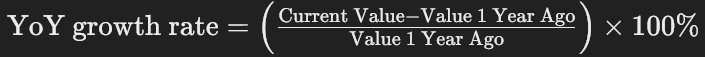

In [10]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1 # year over year growth
gdpc1['gdpc1_us_qoq'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(1)-1 # quater over quater growth

In [11]:
gdpc1.tail()

,GDPC1,gdpc1_us_yoy,gdpc1_us_qoq
DATE,,,
2022-10-01,21989.981,0.006517,0.006354
2023-01-01,22112.329,0.017179,0.005564
2023-04-01,22225.350,0.023825,0.005111
2023-07-01,22490.692,0.029269,0.011939
2023-10-01,22679.255,0.031345,0.008384


In [12]:
gdpc1.loc["2023"] # values for only the year 2023

,GDPC1,gdpc1_us_yoy,gdpc1_us_qoq
DATE,,,
2023-01-01,22112.329,0.017179,0.005564
2023-04-01,22225.350,0.023825,0.005111
2023-07-01,22490.692,0.029269,0.011939
2023-10-01,22679.255,0.031345,0.008384


In [13]:
gdpc1.loc["2023"]['gdpc1_us_yoy'].sum()

0.101617735714705

In [14]:
gdpc1.loc["2023"]['gdpc1_us_yoy'].mean()*100, gdpc1.loc["2023"]['gdpc1_us_yoy'].sum()*100/4

(2.5404433928676253, 2.5404433928676253)

In [15]:
gdpc1_us_yoy_avg_2023 = gdpc1.loc["2023"]['gdpc1_us_yoy'].mean()*100

In [16]:
print(f"Avg YOY growth for the year: is {round(gdpc1_us_yoy_avg_2023,1)} %")

Avg YOY growth for the year: is 2.5 %


# Question 2. [Macro] Inverse "Treasury Yield"

## Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

`DGS2` -  Market Yield on U.S. Treasury Securities at 2-Year Constant Maturity, Quoted on an Investment Basis

`DGS10` -  Market Yield on U.S. Treasury Securities at 2-Year Constant Maturity, Quoted on an Investment Basis



In [17]:
start = dt.date(2000,1,1)

end = dt.date.today()
print(f'Period for indexes: {start} to {end} ')

Period for indexes: 2000-01-01 to 2024-04-19 


In [18]:
dgs2 = pdr.DataReader("DGS2", "fred",start=start, end = end)
dgs10 = pdr.DataReader("DGS10", "fred", start=start, end = end)

In [19]:
dgs2.head()

,DGS2
DATE,
2000-01-03,6.38
2000-01-04,6.30
2000-01-05,6.38
2000-01-06,6.35
2000-01-07,6.31


In [20]:
dgs10.head()

,DGS10
DATE,
2000-01-03,6.58
2000-01-04,6.49
2000-01-05,6.62
2000-01-06,6.57
2000-01-07,6.52


In [22]:
merge_result = pd.merge(dgs2, dgs10, left_index=True, right_index=True)

In [23]:
merge_result.head()

,DGS2,DGS10
DATE,,
2000-01-03,6.38,6.58
2000-01-04,6.30,6.49
2000-01-05,6.38,6.62
2000-01-06,6.35,6.57
2000-01-07,6.31,6.52


In [24]:
merge_result["delta(DGS10-DGS2)"] = merge_result['DGS10'] - merge_result['DGS2']

In [25]:
merge_result.head()

,DGS2,DGS10,delta(DGS10-DGS2)
DATE,,,
2000-01-03,6.38,6.58,0.20
2000-01-04,6.30,6.49,0.19
2000-01-05,6.38,6.62,0.24
2000-01-06,6.35,6.57,0.22
2000-01-07,6.31,6.52,0.21


In [29]:
min_delta = merge_result['delta(DGS10-DGS2)'].min()
min_delta

-1.0800000000000005

In [31]:
print(f'The min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and rounded to 1 digit after the decimal point is \n {round(min_delta,1)}')

The min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and rounded to 1 digit after the decimal point is 
 -1.1


## Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?

# Question 3. [Index] Which Index is better recently?

## Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

In [58]:
start = dt.date(2019,4,9)
end = dt.date(2024,4,10) # including the date 2024-04-09
print(f'Period for indexes: {start} to {end} ')

Period for indexes: 2019-04-09 to 2024-04-10 


In [59]:
df_mxx = yf.download("^MXX",
                     start = start,
                     end = end,
                     interval = "1d" )
df_snp500_daily = yf.download("^GSPC",
                              start = start,
                              end = end,
                              interval = "1d")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [60]:
df_mxx.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-09,45346.828125,45346.828125,44854.531250,45151.628906,45151.628906,191575000
2019-04-10,45204.750000,45219.410156,44850.109375,44909.140625,44909.140625,145314900
2019-04-11,44872.531250,44966.500000,44373.488281,44580.058594,44580.058594,109090000
2019-04-12,44767.671875,44888.699219,44534.378906,44686.058594,44686.058594,143662400
2019-04-15,44649.738281,44900.929688,44347.531250,44625.781250,44625.781250,108627100


In [61]:
df_mxx.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-03,57547.191406,58086.421875,57300.109375,57503.390625,57503.390625,189285300
2024-04-04,57539.468750,58219.500000,57514.179688,57882.761719,57882.761719,184739700
2024-04-05,57805.191406,58227.839844,57678.609375,58092.441406,58092.441406,212252300
2024-04-08,58021.660156,58192.320312,57749.441406,57989.941406,57989.941406,154641800
2024-04-09,58010.371094,58298.769531,57492.058594,57571.148438,57571.148438,202213300


In [62]:
df_snp500_daily.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-09,2886.580078,2886.879883,2873.330078,2878.199951,2878.199951,3032480000
2019-04-10,2881.370117,2889.709961,2879.129883,2888.209961,2888.209961,3092230000
2019-04-11,2891.919922,2893.419922,2881.989990,2888.320068,2888.320068,2970650000
2019-04-12,2900.860107,2910.540039,2898.370117,2907.409912,2907.409912,3726050000
2019-04-15,2908.320068,2909.600098,2896.479980,2905.580078,2905.580078,3114530000


In [64]:
df_snp500_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-03,5194.370117,5228.750000,5194.370117,5211.490234,5211.490234,3703250000
2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000
2024-04-05,5158.950195,5222.180176,5157.209961,5204.339844,5204.339844,3386780000
2024-04-08,5211.370117,5219.569824,5197.350098,5202.390137,5202.390137,3278180000
2024-04-09,5217.029785,5224.810059,5160.779785,5209.910156,5209.910156,3400680000


In [65]:
df_mxx.loc["2019-04-09", ["Open", "High", "Low", "Close"]], \
df_mxx.loc["2019-04-09", ["Open", "High", "Low", "Close"]].mean()

(Open     45346.828125
 High     45346.828125
 Low      44854.531250
 Close    45151.628906
 Name: 2019-04-09 00:00:00, dtype: float64,
 45174.9541015625)

In [66]:
df_snp500_daily.loc["2019-04-09", ["Open", "High", "Low", "Close"]], \
df_snp500_daily.loc["2019-04-09", ["Open", "High", "Low", "Close"]].mean()

(Open     2886.580078
 High     2886.879883
 Low      2873.330078
 Close    2878.199951
 Name: 2019-04-09 00:00:00, dtype: float64,
 2881.2474975585938)

Choosing the `Adj. Close` for the comparison of the growth for MXX and SNP 500 index

In [67]:
df_mxx.loc['2019-04-09', 'Adj Close']

45151.62890625

In [68]:
pct_growth_mxx = (df_mxx.loc['2024-04-09', 'Adj Close'] - df_mxx.loc['2019-04-09', 'Adj Close'])*100/df_mxx.loc['2019-04-09', 'Adj Close']

27.506249125667445

In [69]:
pct_growth_snp =  (df_snp500_daily.loc['2024-04-09', 'Adj Close'] - df_snp500_daily.loc['2019-04-09', 'Adj Close'])*100/df_snp500_daily.loc['2019-04-09', 'Adj Close']

In [70]:
pct_growth_snp

81.01279426847174

In [78]:
def decide_better(pct_growth_mxx, pct_growth_snp):
  max_growth = max(round(pct_growth_mxx,0), round(pct_growth_snp,0))
  if(pct_growth_mxx>pct_growth_snp):
    return "Index MXX", max_growth
  elif(pct_growth_mxx<pct_growth_snp):
    return "Index SNP500", max_growth
  else:
    return "Both", max_growth

In [79]:
better_index = decide_better(pct_growth_mxx,pct_growth_snp)
better_index

('Index SNP500', 81.0)

In [82]:
print(f'Ans3: the higher growing index is "{better_index[0]}" and the growth in % (closest integer %) is "{better_index[1]}"')

the higher growing index is "Index SNP500" and the growth in % (closest integer %) is "81.0"


## Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

# Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks

## Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023

Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value. Round the result to two decimal places (e.g. 0.1575 will be 0.16)

In [86]:
!wget -O top_5_companies.csv https://companiesmarketcap.com/most-profitable-companies/?download=csv

--2024-04-19 15:36:20--  https://companiesmarketcap.com/most-profitable-companies/?download=csv
Resolving companiesmarketcap.com (companiesmarketcap.com)... 104.26.5.188, 104.26.4.188, 172.67.74.203, ...
Connecting to companiesmarketcap.com (companiesmarketcap.com)|104.26.5.188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘top_5_companies.csv’

top_5_companies.csv     [ <=>                ] 538.23K  --.-KB/s    in 0.06s   

2024-04-19 15:36:20 (9.07 MB/s) - ‘top_5_companies.csv’ saved [551148]



In [91]:
top_companies_df = pd.read_csv('./top_5_companies.csv', header=0)

In [92]:
top_companies_df.head()

,Rank,Name,Symbol,earnings_ttm,price (USD),country
0,1,Saudi Aramco,2222.SR,2.369640e+11,7.98,Saudi Arabia
1,2,Berkshire Hathaway,BRK-B,1.251690e+11,403.20,United States
2,3,Apple,AAPL,1.214160e+11,165.13,United States
3,4,Microsoft,MSFT,1.012100e+11,401.25,United States
4,5,Alphabet (Google),GOOG,8.602500e+10,156.14,United States


In [95]:
top_6_companies_df = top_companies_df[:6]
top_6_companies_df

,Rank,Name,Symbol,earnings_ttm,price (USD),country
0,1,Saudi Aramco,2222.SR,2.369640e+11,7.98,Saudi Arabia
1,2,Berkshire Hathaway,BRK-B,1.251690e+11,403.20,United States
2,3,Apple,AAPL,1.214160e+11,165.13,United States
3,4,Microsoft,MSFT,1.012100e+11,401.25,United States
4,5,Alphabet (Google),GOOG,8.602500e+10,156.14,United States
5,6,JPMorgan Chase,JPM,6.161200e+10,183.09,United States


In [97]:
list_top_6 = top_6_companies_df['Symbol'].to_list()
list_top_6

['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

In [104]:
start = dt.date(2023,1,1)
end = dt.date(2024,1,1)
print(f'Period for indexes: {start} to {end} ')

Period for indexes: 2023-01-01 to 2024-01-01 


In [105]:
df_2222_SR = yf.download('2222.SR',
                     start = start,
                     end = end,
                     interval = "1d" )
df_2222_SR.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-25,33.000000,33.099998,32.849998,33.099998,32.927525,15869070
2023-12-26,33.049999,33.099998,32.900002,33.049999,32.877789,14598967
2023-12-27,33.099998,33.250000,33.000000,33.150002,32.977268,14815683
2023-12-28,33.150002,33.250000,32.950001,33.049999,32.877789,12720450
2023-12-31,33.049999,33.099998,32.900002,33.000000,32.828049,10776909


In [114]:
df_2222_SR.loc['2023-01-01'], df_2222_SR.loc['2023-12-31']

(Open         2.922727e+01
 High         2.945454e+01
 Low          2.918182e+01
 Close        2.945454e+01
 Adj Close    2.847579e+01
 Volume       1.569087e+06
 Name: 2023-01-01 00:00:00, dtype: float64,
 Open         3.305000e+01
 High         3.310000e+01
 Low          3.290000e+01
 Close        3.300000e+01
 Adj Close    3.282805e+01
 Volume       1.077691e+07
 Name: 2023-12-31 00:00:00, dtype: float64)

In [116]:
range_ratio_2222_SR = (max(df_2222_SR['Adj Close']) - min(df_2222_SR['Adj Close']))/ max(df_2222_SR['Adj Close'])
range_ratio_2222_SR

0.21393070882746015

In [106]:
df_BRK_B = yf.download('BRK-B',
                     start = start,
                     end = end,
                     interval = "1d" )
df_BRK_B.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,356.500000,358.260010,355.410004,356.470001,356.470001,2332200
2023-12-26,356.899994,357.769989,356.079987,356.829987,356.829987,1964400
2023-12-27,355.929993,357.079987,355.500000,356.950012,356.950012,2478500
2023-12-28,357.480011,358.679993,356.730011,357.570007,357.570007,2740600
2023-12-29,357.559998,357.859985,355.309998,356.660004,356.660004,3269400


In [118]:
range_ratio_BRK_B = (max(df_BRK_B['Adj Close']) - min(df_BRK_B['Adj Close']))/ max(df_BRK_B['Adj Close'])
range_ratio_BRK_B

0.20775750091289963

In [107]:
df_AAPL = yf.download('AAPL',
                     start = start,
                     end = end,
                     interval = "1d" )
df_AAPL.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [119]:
range_ratio_AAPL = (max(df_AAPL['Adj Close']) - min(df_AAPL['Adj Close']))/ max(df_AAPL['Adj Close'])
range_ratio_AAPL

0.37244419224463476

In [108]:
df_MSFT = yf.download('MSFT',
                     start = start,
                     end = end,
                     interval = "1d" )
df_MSFT.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,373.679993,375.179993,372.709991,374.579987,373.888580,17091100
2023-12-26,375.000000,376.940002,373.500000,374.660004,373.968445,12673100
2023-12-27,373.690002,375.059998,372.809998,374.070007,373.379547,14905400
2023-12-28,375.369995,376.459991,374.160004,375.279999,374.587280,14327000
2023-12-29,376.000000,377.160004,373.480011,376.040009,375.345886,18723000


In [120]:
range_ratio_MSFT = (max(df_MSFT['Adj Close']) - min(df_MSFT['Adj Close']))/ max(df_MSFT['Adj Close'])
range_ratio_MSFT

0.4242066515530231

In [109]:
df_GOOG = yf.download('GOOG',
                     start = start,
                     end = end,
                     interval = "1d" )
df_GOOG.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400
2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500
2023-12-29,140.679993,141.434998,139.899994,140.929993,140.929993,14872700


In [121]:
range_ratio_GOOG = (max(df_GOOG['Adj Close']) - min(df_GOOG['Adj Close']))/ max(df_GOOG['Adj Close'])
range_ratio_GOOG

0.3924520921912013

In [117]:
df_JPM = yf.download('JPM',
                     start = start,
                     end = end,
                     interval = "1d" )
df_JPM.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,167.500000,168.229996,167.229996,167.399994,165.409225,6574900
2023-12-26,167.460007,168.770004,167.179993,168.389999,166.387451,4683600
2023-12-27,167.839996,169.470001,167.580002,169.399994,167.385437,6428600
2023-12-28,169.350006,170.660004,169.000000,170.300003,168.274734,6320100
2023-12-29,170.000000,170.690002,169.630005,170.100006,168.077118,6431800


In [122]:
range_ratio_JPM = (max(df_JPM['Adj Close']) - min(df_JPM['Adj Close']))/ max(df_JPM['Adj Close'])
range_ratio_JPM

0.28249923173202013

In [123]:
largest_range_ratio = max([range_ratio_2222_SR,
                           range_ratio_AAPL,
                           range_ratio_BRK_B,
                           range_ratio_GOOG,
                           range_ratio_JPM,
                           range_ratio_MSFT])

In [125]:
print(f'The largest range ratio [=(max-min)/max] of Adj.Close prices in 2023 is {round(largest_range_ratio,2)}')

The largest range ratio [=(max-min)/max] of Adj.Close prices in 2023 is 0.42


## Additional: why this may be important for your research?

# Question 5. [Stocks] Dividend Yield

## Find the largest dividend yield for the same set of stocks

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023. You can use get_actions() method or .dividends field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximm value in % and round to 1 digit after the decimal point. (E.g., if you obtained `$1.25` dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)


In [126]:
df_2222_SR_ticker = yf.Ticker("2222.SR")

In [127]:
df_2222_SR_ticker.dividends

Date
2020-03-19 00:00:00+03:00    0.060992
2020-05-31 00:00:00+03:00    0.290744
2020-08-12 00:00:00+03:00    0.290744
2020-11-10 00:00:00+03:00    0.290744
2021-03-23 00:00:00+03:00    0.290744
2021-05-17 00:00:00+03:00    0.290744
2021-08-16 00:00:00+03:00    0.290744
2021-11-07 00:00:00+03:00    0.290744
2022-05-24 00:00:00+03:00    0.290727
2022-08-22 00:00:00+03:00    0.290727
2022-11-09 00:00:00+03:00    0.290727
2023-03-15 00:00:00+03:00    0.302364
2023-05-17 00:00:00+03:00    0.302400
2023-09-11 00:00:00+03:00    0.153000
2023-11-15 00:00:00+03:00    0.153000
2024-03-14 00:00:00+03:00    0.167000
Name: Dividends, dtype: float64

In [128]:
df_2222_SR_ticker.dividends['2023']

Date
2023-03-15 00:00:00+03:00    0.302364
2023-05-17 00:00:00+03:00    0.302400
2023-09-11 00:00:00+03:00    0.153000
2023-11-15 00:00:00+03:00    0.153000
Name: Dividends, dtype: float64

In [133]:
df_2222_SR.iloc[-1],df_2222_SR.iloc[-1]['Adj Close']

(Open         3.305000e+01
 High         3.310000e+01
 Low          3.290000e+01
 Close        3.300000e+01
 Adj Close    3.282805e+01
 Volume       1.077691e+07
 Name: 2023-12-31 00:00:00, dtype: float64,
 32.82804870605469)

In [137]:
dividend_df = pd.DataFrame()

In [140]:
dividend_df['Symbol'] = '2222.SR'
dividend_df['dividends'] = df_2222_SR_ticker.dividends['2023']
dividend_df['adj_close'] = df_2222_SR.iloc[-1]['Adj Close']

In [141]:
dividend_df

,Symbol,dividends,adj_close
Date,,,
2023-03-15 00:00:00+03:00,2222.SR,0.302364,32.828049
2023-05-17 00:00:00+03:00,2222.SR,0.302400,32.828049
2023-09-11 00:00:00+03:00,2222.SR,0.153000,32.828049
2023-11-15 00:00:00+03:00,2222.SR,0.153000,32.828049


In [142]:
dividend_df.loc[dividend_df['Symbol']=='2222.SR','adj_close']

Date
2023-03-15 00:00:00+03:00    32.828049
2023-05-17 00:00:00+03:00    32.828049
2023-09-11 00:00:00+03:00    32.828049
2023-11-15 00:00:00+03:00    32.828049
Name: adj_close, dtype: float64

In [143]:
dividend_df.loc[dividend_df['Symbol']=='2222.SR']

,Symbol,dividends,adj_close
Date,,,
2023-03-15 00:00:00+03:00,2222.SR,0.302364,32.828049
2023-05-17 00:00:00+03:00,2222.SR,0.302400,32.828049
2023-09-11 00:00:00+03:00,2222.SR,0.153000,32.828049
2023-11-15 00:00:00+03:00,2222.SR,0.153000,32.828049


Get all the required info and put into a datafram, then join them together

In [ ]:
dividend_df['Symbol'] = '2222.SR'
dividend_df['dividends'] = df_2222_SR_ticker.dividends['2023']
dividend_df['adj_close'] = df_2222_SR.iloc[-1]['Adj Close']

# Question 6. [Exploratory] Investigate new metrics

## `Free text answer` Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

# Question 7. [Exploratory] Time-driven strategy description around earnings releases

Free text answer
Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.


Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08).
